# Section 3: 3D visualisation and plotting

Here we explain the use of 3D plotting, and introduce GeoVista and PyVista


## 3D visualisation

Unlike UM data, which is mostly plotted on a map projection, the most usual way to plot LFRic data is in a 3D viewer.  

There are a few key reasons for this :
  1. LFRic gridcells are not lat-lon aligned like the UM, so 2D plotting is not such a direct operation
  2. LFRic data often has too many cells for easy plotting with matplotlib


### What Geovista is for

GeoVista adds geo-location facilities to PyVista, allowing us to plot geolocated data in a 3D view.

The key supporting softweare components are these (***follow links for more detail***):
  * [**VTK**](https://vtk.org/) : highly mature 3D visualisation library (C++)
  * [**PyVista**](https://pyvista.org/) : VTK for Python
  * [**GeoVista**](https://github.com/bjlittle/geovista#readme) : geolocation for PyVista
     * map projections + transforms
     * geolocated data and regions
     * coastlines

### Geovista basic demo : an interactive plot of ocean data

A simple self-contained demonstration

In [1]:
# Import things from Geovista
import sys
sys.path.append('/g/data/access/ngm/data/umtutorial2023/ngux/iris-mesh-tutorial/notebooks/')
import pyvista
pyvista.start_xvfb()
import geovista as gv

In [2]:
# Copied from : https://github.com/bjlittle/geovista/blob/main/src/geovista/examples/from_2d__orca.py
from geovista.pantry import um_orca2

sample = um_orca2()

In [3]:
# A local utility routine
import display_demo_routines

from display_demo_routines import popup_2d_data_xx_yy

In [4]:
# launch
popup_2d_data_xx_yy(sample, "ORCA test data")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Using GeoVista/PyVista with Iris


There are as yet *no* facilities in Iris for plotting unstructed cubes.  
We can do that using PyVista, but first, we need to convert the data to a PyVista format.  

**NOTE**
  * Geovista is not Iris-dependent
  * Iris does not (yet) fully integrate Geovista
  * .. therefore user code is currently needed to bridge the two
  * .. **but** the gap is fairly small, and this makes Geovista more generally useful

In [5]:
# Load a 2D 'relative_humidity' cube data, with tutorial utility function as before
# This is the same cube we loaded back in [Section#02 "Fetch some sample data"](./Sec_02_Meshes.ipynb#Fetch-some-sample-unstructured-data,-as-used-in-Section#01)**
from testdata_fetching import lfric_rh_singletime_2d
lfric_rh = lfric_rh_singletime_2d()

### Convert an Iris cube to a PyVista `PolyData`

As the conversion code is non-trivial, we provided a utility function.  
We import and use `pv_conversions.pv_from_lfric_cube` (provided here in the tutorial).

In [6]:
from pv_conversions import pv_from_lfric_cube

pv = pv_from_lfric_cube(lfric_rh)

This produces a PyVista ["PolyData"](https://docs.pyvista.org/api/core/_autosummary/pyvista.PolyData.html#pyvista-polydata) object.  

**Print that to take a look a it.**

In [7]:
pv

PolyData (0x7f627e9b2e80)
  N Cells:	13824
  N Points:	13826
  N Strips:	0
  X Bounds:	-1.000e+00, 1.000e+00
  Y Bounds:	-1.000e+00, 1.000e+00
  Z Bounds:	-1.000e+00, 1.000e+00
  N Arrays:	4

Note: like `Cube`s + `CubeList`s, these `PolyData` objects are provided with a specific visible within the Jupyter notebooks.  
This is displayed when you just enter the variable in a cell.  

You can also use "print(x)" to display the standard string representation of the object, but usually the notebook-style output is a bit more useful.

### Instant 3D plot

We can plot a `PolyData` simply by calling its `.plot()` method.

In [8]:
pv.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**NOTES**:
  * this plot is interactive -- try dragging to rotate, and the mouse scroll-wheel to zoom
  * this obviously causes some clutter and uses up some space (e.g. you can't easily scroll past it)  
    * To ***remove*** a plot output, in a notebook, use "Clear Output" from the "Edit" menu (or from right-click on the cell)
  * alternatively, set the keyword `jupyter_backend='static'` in the command, for output as a plain image



### Create a plotter to display 3D visualisation of data from Iris

There are a lot more keywords available to [the `PolyData.plot()` method](https://docs.pyvista.org/api/core/_autosummary/pyvista.PolyData.plot.html), but it is not ideal to overcomplicate these calls.  

Finer control is better achieved in a different way:  We create a GeoVista/PyVista `Plotter` object, and deal with that directly.

The full process for this involves a few steps ...

#### Create a `pyvista.Plotter `
We will create a [PyVista "plotter"](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.Plotter.html#pyvista.Plotter) object to display things in 3D.  

However, since our data is geo-located, we will use the special subtype `GeoPlotter`, from [GeoVista](https://github.com/bjlittle/geovista#philisophy) for this.

In [22]:
from geovista import GeoPlotter
plotter = GeoPlotter()

Note: various control arguments can be added to `GeoPlotter()`.  
But none are required by default.

---

#### Call the plotter [`add_mesh`](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.BasePlotter.add_mesh.html#add-mesh) function
We pass in the PolyData object.  
There are lots of possible other keywords, but none are required.

( **N.B.** don't worry about the object which this passes back -- just discard it, for now ).

In [10]:
_ = plotter.add_mesh(pv)

#### Call [`Plotter.show()`](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.Plotter.show.html#pyvista.Plotter.show) to display
<details><summary>Sample code solution : <b>click to reveal</b></summary>

```python
plotter.show()
```
</details>

In [11]:
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**Some odd notes:**
  * VTK/PyVista doesn't use plot "types".  
    Instead, you add meshes to a plotter + can subsequently control the presentation.
  * By default, `plotter.show()` opens an interactive window : **you can rotate and zoom it with the mouse**.
    * you can instead generate static output 
        * in a notebook, you do this with `jupyter_backend='static'`
        * or in a Python session, try `interactive=False`
  * GeoVista can also produce more familiar 2D plots (described in a later section ...)


### Additional features

The above hasn't yet actually added to what we can do with a simple`PolyData.plot()`.

However, when you create your own GeoPlotter, you can do a lot more to control the view, and add useful aspects.

**What can each of the following GeoPlotter methods do ?...**
( N.B. there is no rendered GeoVista API yet, but you can see the code docstrings, e.g. [here](https://github.com/bjlittle/geovista/blob/v0.1.1/src/geovista/geoplotter.py#L69) )
  * [add_coastlines](https://github.com/bjlittle/geovista/blob/v0.1.1/src/geovista/geoplotter.py#L193-L215) 
  * [add_axes](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.BasePlotter.add_axes.html#pyvista.BasePlotter.add_axes)
  * [add_base_layer](https://github.com/bjlittle/geovista/blob/v0.1.1/src/geovista/geoplotter.py#L122-L159)  (hint: look in the source of the `demo_display_2d_xx_yy_data` routine)
  * add_camera_orientation_widget

Note : of these, 'coastlines' and 'base_layer' are GeoVista concepts, while 'axes' and 'camera_orientation_widget' are from PyVista.  
The `GeoPlotter` is simply a specialised (extended) version of a `PyVista.Plotter`.

Another very useful resource is the GeoVista runnable examples.  
See : https://github.com/bjlittle/geovista/tree/main/src/geovista/examples

In [12]:
# .. space for user code (E.G. try "add_coastlines") ...

### Controlling the 3D view

Unlike 2D plotting, we can't simply set the view to show a given coordinate range.
However, we can record and control the camera position.

In [13]:
viewpoint = plotter.camera_position
viewpoint

[(3.8637033051562737, 3.8637033051562737, 3.8637033051562737),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

---

**For example**, this pre-loaded position focusses the view on a cubesphere "corner" in the middle East :

In [14]:
viewpoint = [
    (1.1555926379084704, 1.1347715619001786, 1.1660979285179414),
    (0.0, 0.0, 0.0),
    (-0.3202752464164226, -0.5004192729867467, 0.80436578604284)
]

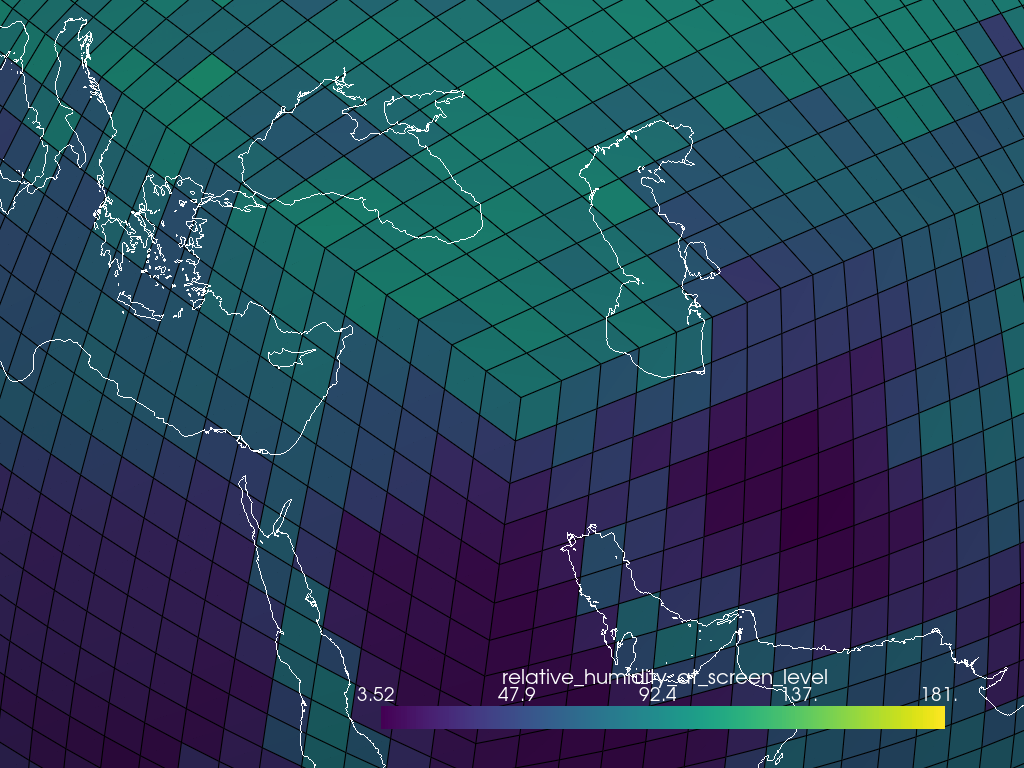

In [15]:
# Plot the LFRIC data with this same view ...
new_plotter = GeoPlotter()
new_plotter.add_coastlines()
new_plotter.add_mesh(pv, show_edges=True)
new_plotter.camera_position = viewpoint
new_plotter.show(jupyter_backend='static')

---

The easiest way to manage this is to manually rotate and zoom, and then capture the result,  
***like this ...***

In [16]:
view = new_plotter.camera_position
print(view)

[(1.1555926379084704, 1.1347715619001786, 1.1660979285179414),
 (0.0, 0.0, 0.0),
 (-0.3202752464164226, -0.5004192729867467, 0.80436578604284)]


***A Simple Exercise:*** 
  * zoom + scroll the above window as desired, and then capture the result in a variable, as just shown.  
  * show that you can reproduce that view with other data.


## Comparing UM and LFRic fields

### Fetch some equivalent UM data

In [17]:
from testdata_fetching import um_rh_singletime_2d
#um_rh = iris.load_cube(um_filepth, 'relative_humidity')
um_rh = um_rh_singletime_2d()
# Rename so we are clear which model this came from
um_rh.rename('UM Rh data')
um_rh

<iris 'Cube' of UM Rh data / (%) (latitude: 144; longitude: 192)>

---
#### Plot in matplotlib
For reference, as this is ordinary "structured" data, let's quickly plot it on an old-style Iris matplotlib plot.


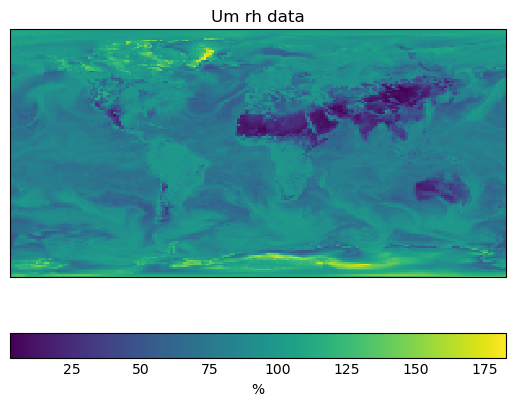

In [18]:
import iris.quickplot  as qplt
qplt.pcolormesh(um_rh)

---
### Convert the UM cube to a PolyData

To plot this in 3d, we must convert it to PolyData.  

For this, we have another utility routine which allows us to convert "ordinary" structured cubes.  
See : `pv_conversions.pv_from_um_cube`

In [19]:
from pv_conversions import pv_from_um_cube
um_pv = pv_from_um_cube(um_rh)
um_pv.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**Note :** 
This is still traditional "structured" data on its original UM lat-lon grid.

***Simple Exercise:***
You can see this clearly by zooming in on one pole -- where the cells get very narrow.

## Simple side-by-side plotting : UM vs LFRic data

Let's compare the matched UM and LFRic data fields by eye, in side-by-side 3D view.

This is mostly a demonstration of what can be achieved, which is fairly complicated,  
so we have provided another utility routine ...

**Using the function `display_demo_routines.side_by_side_plotter` ...**

In [20]:
from display_demo_routines import side_by_side_plotter
plt = side_by_side_plotter(pv, um_pv)
plt.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

---

**For reference : a focussed, static plot of the same**

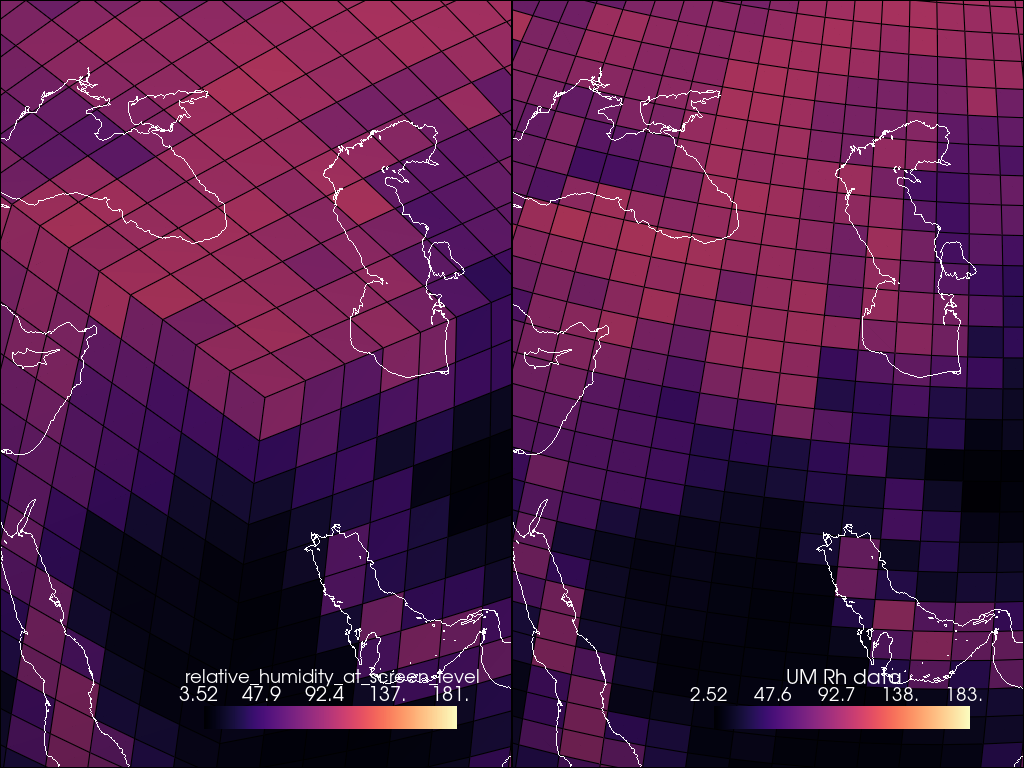

In [21]:
plt.camera_position = viewpoint
plt.show(jupyter_backend='static')

## Projected 2D plotting using GeoVista

As Geovista is concerned with geolocation, it also understands map projections.
This makes it possible to put data on map, producing the more familiar style of 2D plots.

The simplest solution is to specify a projection with the `crs` keyword in the GeoPlotter constructor call.  
The argument takes a "proj string" specifier for the projection: 
[See general details of those here](https://proj.org/usage/quickstart.html), and [here is the list of supported projections](https://proj.org/operations/projections/index.html).

Here's a very simple example, specifying an [Eckart-IV projection](https://proj.org/operations/projections/eck4.html) ...

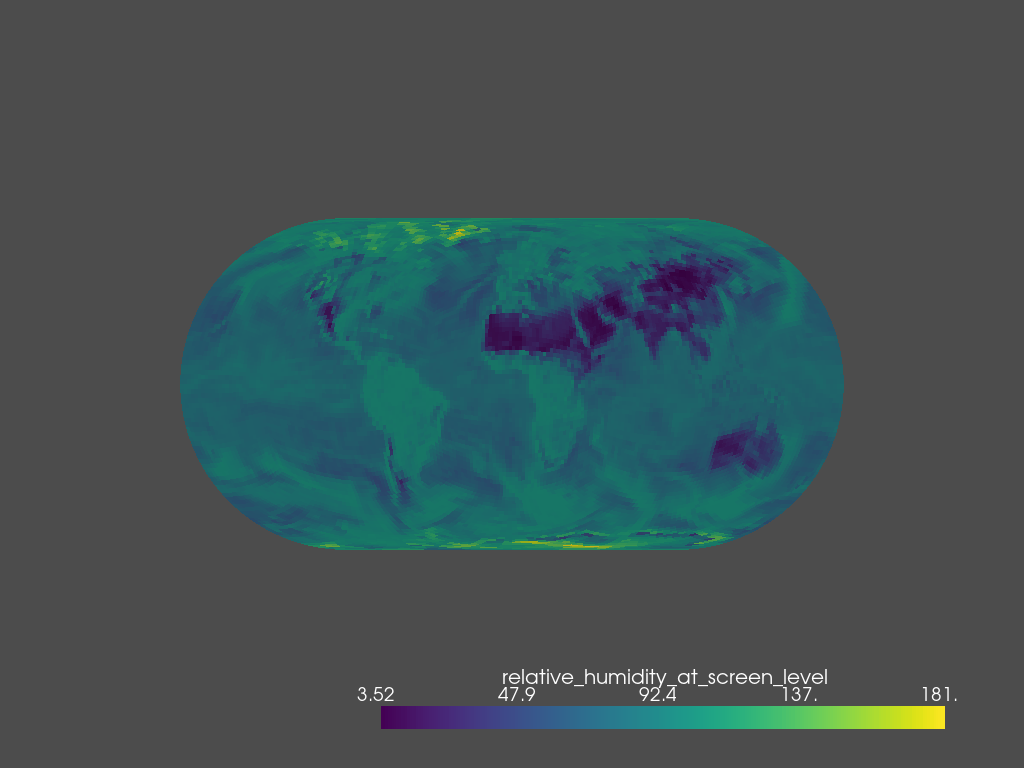

In [24]:
proj_string = '+proj=eck4'
plotter = GeoPlotter(crs=proj_string)
plotter.add_mesh(pv)
# Note: it's important to view down the Z axis
plotter.view_xy()
plotter.show(jupyter_backend='static')

---

**NOTES:**
  * these "2D plots" are actually flat objects in a 3D space
    * if you make an interactive plot, you can rotate the panel -- ***try this***
  * the support is still somewhat experimental -- possibly, not all projections will work correctly
  * unfortunately, `plotter.add_coastlines()` does ***not*** yet work with projected plots


## Next notebook
See the next section: [04 - Regridding and UM data comparison](./Sec_04_Regridding.ipynb)